In [ ]:
""""Does not work: galaxies matched from the original Sarah code, not the posterior match_halos.py"""

import h5py
import numpy as np

def count_galaxies_in_h5(file_path):
    # Open the HDF5 file in read mode
    with h5py.File(file_path, 'r') as hf:
        if 'gal_ids' in hf:
            gal_ids = hf['gal_ids'][:]
            print(gal_ids)  # Print all galaxy IDs
            if np.isnan(gal_ids).all():
                print("Warning: All galaxy IDs are NaN.")
            total_galaxies = len(gal_ids)
            # Count only non-NaN values
            total_valid_galaxies = np.count_nonzero(~np.isnan(gal_ids))
            print(f"Total number of galaxies saved: {total_galaxies}")
            print(f"Number of valid galaxy IDs: {total_valid_galaxies}")
        else:
            print("Dataset 'gal_ids' not found in the file.")

file_path = "/home/pedroleo/pedroshp/samples/m50n512_s50nojet_078_galaxy_sample.h5"
count_galaxies_in_h5(file_path)


In [ ]:
base_gals = [8, 10, 9, 265, 50, 49, 12, 13, 18, 26, 62, 71, 90, 93, 15, 119, 37, 184, 36, 28, 125, 47, 38, 84, 130, 39, 80, 97, 57, 74, 41, 56, 322, 75, 96, 177, 45, 83, 246, 126, 91, 66, 137, 211, 198, 340, 118, 303, 148, 210, 128, 183, 332, 124, 217, 154, 189, 133, 185, 186, 295, 253, 257, 319, 261, 318]
match_gals = [5, 15, 4, 174, 90, 46, 9, 13, 28, 18, 47, 64, 76, 49, 63, 96, 22, 125, 21, 43, 134, 39, 92, 112, 78, 54, 79, 171, 81, 105, 27, 121, 351, 65, 165, 94, 31, 131, 133, 118, 62, 95, 83, 124, 267, 333, 84, 272, 126, 136, 73, 249, 540, 82, 142, 89, 187, 117, 166, 195, 312, 184, 404, 322, 251, 271]

# Create a dictionary to map each base galaxy ID to its match galaxy ID
galaxy_mapping = dict(zip(base_gals, match_gals))

# Print the dictionary
print(galaxy_mapping)

print("Length of base and match gals:")
print(len(base_gals))
print(len(match_gals))


In [ ]:
# Original IDs provided
original_ids = [318, 322, 257, 319, 332, 217, 246, 253, 295, 265, 261, 303, 340, 185, 148, 198, 186, 184,
                154, 210, 211, 183, 148, 177, 210, 189, 90, 137, 96, 125, 130, 124, 97, 133, 93, 126,
                91, 90, 128, 118, 119, 84, 80, 57, 74, 83, 62, 66, 74, 71, 75, 56, 83, 28,
                50, 39, 26, 38, 36, 37, 47, 41, 39, 45, 26, 49, 8, 10, 12, 19, 7, 9,
                15, 13, 8, 18]

print("Length of original_ids:", len(original_ids))
print("Unique elements in original_ids:", len(set(original_ids)))


# Convert lists to sets for easier comparison
original_set = set(original_ids)
base_gals_set = set(base_gals)

# Find missing IDs
missing_ids = original_set - base_gals_set


print("Missing IDs:", missing_ids)

In [ ]:
import os

def count_files(directory):
    """Counts the number of files in the given directory."""
    return len([name for name in os.listdir(directory) if os.path.isfile(os.path.join(directory, name))])

# Specify the directory path
directory_path = '/home/pedroleo/pedroshp/data/normal/m50n512_s50_078'

# Count the files
file_count = count_files(directory_path)
print("Number of files in directory:", file_count)

print((file_count -1) /240) 
print("So there are only 68 galaxies in my jet model sample! (240 files per galaxy)")


In [ ]:
"""Getting rid of galaxies not in both wind models (only two)"""

import shutil
import glob
import os

# Source directory where the files are currently stored
source_dir = '/home/pedroleo/pedroshp/data/normal/m50n512_s50_078'

# Target directory where files will be transferred
target_dir = '/home/pedroleo/pedroshp/data-not-in-both-wind-models'

# Patterns to match specific files to transfer
patterns = ['sample_galaxy_7_*', 'sample_galaxy_19_*']

# Ensure the target directory exists, create if it doesn't
os.makedirs(target_dir, exist_ok=True)

# Loop over each pattern
for pattern in patterns:
    # Construct the full path pattern
    full_pattern = os.path.join(source_dir, pattern)
    
    # Find all files matching the pattern
    files_to_transfer = glob.glob(full_pattern)
    
    # Transfer each file
    for file_path in files_to_transfer:
        # Determine the destination path
        destination_path = os.path.join(target_dir, os.path.basename(file_path))
        
        # Copy the file to the new location
        shutil.copy(file_path, destination_path)
        print(f"Transferred '{file_path}' to '{destination_path}'")

print("All specified files have been transferred.")


In [ ]:
import h5py

def count_galaxies_in_h5(file_path):
    # Open the HDF5 file in read mode
    with h5py.File(file_path, 'r') as hf:
        if 'gal_ids' in hf:
            gal_ids = hf['gal_ids'][:]
            print(gal_ids)
            total_galaxies = len(gal_ids)
            print(f"Total number of galaxies saved: {total_galaxies}")
        else:
            print("Dataset 'gal_ids' not found in the file.")

file_path = '/home/pedroleo/pedroshp/samples-nojet/m50n512_s50nojet_078_galaxy_sample.h5'
count_galaxies_in_h5(file_path)


In [ ]:
"""plotting our galaxy sample for different SFR categories"""

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import h5py
import numpy as np
import sys
import caesar

def ssfr_b_redshift(z):
    return 1.9*np.log10(1+z) - 7.7

def belfiore_line(mstar, a=0.73, b=-7.7):
    return mstar*a + b

def sfms_line(mstar, a=1., b=-10.8):
    return mstar*a + b

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({},{:.2f},{:.2f})'.format(cmap.name, minval, maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

def convert_to_log(y, yerr):
    yerr /= (y * np.log(10.))
    y = np.log10(y)
    return y, yerr

def runningmedian(x, y, xlolim=-1.e20, ylolim=-1.e20, bins=10, stat='median'):
    xp = x[(x > xlolim) & (y > ylolim)]
    yp = y[(x > xlolim) & (y > ylolim)]
    hist, bin_edges = np.histogram(xp, bins)
    bin_cent = 0.5 * (bin_edges[1:] + bin_edges[:-1])
    ymedian = np.zeros(bins)
    ysigma = np.zeros(bins)
    for i in range(bins):
        mask = (xp > bin_edges[i]) & (xp < bin_edges[i+1])
        ymedian[i] = np.median(10**yp[mask])
        ysigma[i] = np.std(10**yp[mask])
    ymedian, ysigma = convert_to_log(ymedian, ysigma)
    return bin_cent, ymedian, ysigma

# No LaTeX
plt.rc('text', usetex=False)
plt.rc('font', family='sans-serif', size=15)

cmap = plt.get_cmap('plasma')
cmap = truncate_colormap(cmap, 0.1, 0.9)
greys = plt.get_cmap('Greys')
greys = truncate_colormap(greys, 0.0, 0.5)

def quench_thresh(z):
    return -0.8 + 0.3*z -9.


if __name__ == '__main__':
    model = "m50n512"
    #wind = "s50"
    wind= "s50nojet"
    snap = "078"
    data_dir = f'/home/rad/data/{model}/{wind}/'
    sim = caesar.load(f'{data_dir}Groups/{model}_{snap}.hdf5') 
    redshift = sim.simulation.redshift
    quench = quench_thresh(redshift)

    sample_dir = '/home/pedroleo/pedroshp/samples-nojet/'
    sample_file = f'{sample_dir}{model}_{wind}_{snap}_galaxy_sample.h5'

    with h5py.File(sample_file, 'r') as sf:
        gal_sm = sf['mass'][:]
        gal_sfr = sf['sfr'][:]
        gal_ssfr = sf['ssfr'][:] + 9.

    sm_line = np.arange(9.5, 12.5, 0.5)
    sf_line = sfms_line(sm_line, b=quench)
    q_line = sfms_line(sm_line, b=quench - 1.)

    #plt.scatter(gal_sm, np.log10(gal_sfr + 1e-3), c="black", cmap=cmap, s=10, marker='o', vmin=5, vmax=7, label='Galaxy sample')
    plt.scatter(gal_sm, np.log10(gal_sfr + 1e-3), c="black", s=10, marker='o', label='Galaxy sample')
    plt.plot(sm_line, sf_line, '--', c='blue', label='Star Forming Main Sequence')
    plt.plot(sm_line, q_line, '--', c='red', label='Quenching Threshold')
    plt.xlabel(r'$\log (M_{\star} / M_{\odot})$')
    plt.ylabel(r'$\log ({\rm sSFR} / {\rm Gyr}^{-1})$')

    plt.rcParams["figure.figsize"] = (12,8)
    plt.legend()
    plt.show()


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import h5py
import numpy as np
import caesar

def quench_thresh(z):
    return -0.8 + 0.3 * z - 9.

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({},{:.2f},{:.2f})'.format(cmap.name, minval, maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

def sfms_line(mstar, a=1., b=-10.8):
    return mstar * a + b

def convert_to_log(y, yerr):
    yerr /= (y * np.log(10.))
    y = np.log10(y)
    return y, yerr

def map_categories_to_colors(gal_ids, category_lists, colors):
    color_map = {}
    for category, ids in category_lists.items():
        for id in ids:
            color_map[id] = colors[category]
    return [color_map[id] for id in gal_ids]

# Define galaxy ID categories and corresponding colors, these are what they were originally!!
category_lists = {
    'Star-forming': [10, 13, 15, 26, 28, 38, 49, 50, 57, 74, 75, 84, 96, 118, 119, 125, 128, 148, 183, 186, 189, 198, 257, 261, 265, 295, 303, 318, 319, 322, 332, 340],
    'Green valley': [8, 12, 18, 39, 71, 80, 83, 90, 130, 137, 177, 184, 185],
    'Quenched': [9, 36, 37, 41, 45, 47, 56, 62, 66, 91, 93, 97, 124, 126, 133, 154, 210, 211, 217, 246, 253]
}
colors = {'Star-forming': 'blue', 'Green valley': 'green', 'Quenched': 'red'}

# Base and matched galaxy IDs
base_gals = [8, 10, 9, 265, 50, 49, 12, 13, 18, 26, 62, 71, 90, 93, 15, 119, 37, 184, 36, 28, 125, 47, 38, 84, 130, 39, 80, 97, 57, 74, 41, 56, 322, 75, 96, 177, 45, 83, 246, 126, 91, 66, 137, 211, 198, 340, 118, 303, 148, 210, 128, 183, 332, 124, 217, 154, 189, 133, 185, 186, 295, 253, 257, 319, 261, 318]
match_gals = [5, 15, 4, 174, 90, 46, 9, 13, 28, 18, 47, 64, 76, 49, 63, 96, 22, 125, 21, 43, 134, 39, 92, 112, 78, 54, 79, 171, 81, 105, 27, 121, 351, 65, 165, 94, 31, 131, 133, 118, 62, 95, 83, 124, 267, 333, 84, 272, 126, 136, 73, 249, 540, 82, 142, 89, 187, 117, 166, 195, 312, 184, 404, 322, 251, 271]

# Create a dictionary to map each base galaxy ID to its match galaxy ID and assign colors
galaxy_mapping = dict(zip(base_gals, match_gals))
colors_for_plot = map_categories_to_colors(base_gals, category_lists, colors)

# Prepare the data
model = "m50n512"
wind = "s50nojet"
snap = "078"
data_dir = f'/home/rad/data/{model}/{wind}/'
sim = caesar.load(f'{data_dir}Groups/{model}_{snap}.hdf5') 
redshift = sim.simulation.redshift
quench = quench_thresh(redshift)

sample_dir = '/home/pedroleo/pedroshp/samples-nojet/'
sample_file = f'{sample_dir}{model}_{wind}_{snap}_galaxy_sample.h5'

with h5py.File(sample_file, 'r') as sf:
    gal_sm = sf['mass'][:]
    gal_sfr = sf['sfr'][:]
    gal_ssfr = sf['ssfr'][:] + 9.

# Plotting

plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams.update({'font.size': 16})
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 16

plt.scatter(gal_sm, np.log10(gal_sfr + 1e-3), c=colors_for_plot, s=10, marker='o', label='Galaxy sample')
sm_line = np.arange(9.5, 12.5, 0.5)
sf_line = sfms_line(sm_line, b=quench)
q_line = sfms_line(sm_line, b=quench - 1.)
plt.plot(sm_line, sf_line, '--', c='blue', label='Star Forming Main Sequence')
plt.plot(sm_line, q_line, '--', c='red', label='Quenching Threshold')
plt.xlabel(r'$\log (M_{\star} / M_{\odot})$')
plt.ylabel(r'$\log ({\rm sSFR} / {\rm yr}^{-1})$')
plt.legend()


# Create proxy artists for the legend with filled circles
star_forming_marker = mlines.Line2D([], [], color='blue', marker='o', linestyle='None',
                                    markersize=4, label='originally star-forming')
green_valley_marker = mlines.Line2D([], [], color='green', marker='o', linestyle='None',
                                    markersize=4, label='originally GV')
quenched_marker = mlines.Line2D([], [], color='red', marker='o', linestyle='None',
                                markersize=4, label='originally quenched')


plt.legend(handles=[star_forming_marker, green_valley_marker, quenched_marker])

plt.tight_layout()
plt.savefig('gal_sample_nojet.png', dpi=300)
plt.show()


In [ ]:

plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams.update({'font.size': 16})
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 16


plt.figure(figsize=(10,6))

In [ ]:
# Plot our galaxy sample

##############

# THIS IS THE CORRECT ONE !!

##############

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import h5py
import numpy as np
import sys
import caesar

def ssfr_b_redshift(z):
    return 1.9*np.log10(1+z) - 7.7

def belfiore_line(mstar, a=0.73, b=-7.7):
    # The definition of the SFMS from Belfiore+18 is:
    # log (SFR/Msun/yr) = 0.73 log (Mstar/Msun) - 7.33
    # With a scatter of sigma = 0.39 dex
    return mstar*a + b

def sfms_line(mstar, a=1., b=-10.8):
    return mstar*a + b

"""def quench_thresh(z): # in units of yr^-1 

    return -1.8  + 0.3*z -9. 
    #return -0.8  + 0.3*z -9.    #Pedro  
    #return -1.3  + 0.3*z -9.    #Pedro
"""



def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list('trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
            cmap(np.linspace(minval, maxval, n)))
    return new_cmap

def convert_to_log(y, yerr):
    yerr /= (y*np.log(10.))
    y = np.log10(y)
    return y, yerr

def runningmedian(x,y,xlolim=-1.e20,ylolim=-1.e20,bins=10,stat='median'):
    
    xp = x[(x>xlolim) & (y>ylolim)]
    yp = y[(x>xlolim) & (y>ylolim)]
    hist, bin_edges = np.histogram(xp, bins)
    bin_cent = 0.5*(bin_edges[1:]+bin_edges[:-1])

    ymedian = np.zeros(bins)
    ymean = np.zeros(bins)
    ysigma = np.zeros(bins)
    yper25 = np.zeros(bins)
    yper75 = np.zeros(bins)
    ndata = np.zeros(bins)
    
    for i in range(bins):
        
        mask = (xp > bin_edges[i]) & (xp < bin_edges[i+1])
        
        ymedian[i] = np.median(10**yp[mask])
        ymean[i] = np.mean(10**yp[mask])
        ysigma[i] = np.std(10**yp[mask])
        yper25[i] = np.percentile(10**yp[mask], 25.)
        yper75[i] = np.percentile(10**yp[mask], 75.)
        ndata[i] = len(yp[mask])

    ymean, ysigma = convert_to_log(ymean, ysigma)
    yper_lo = ymedian - yper25; yper_hi = yper75 - ymedian
    ymedian, ypers = convert_to_log(ymedian, [yper_lo, yper_hi])
    return bin_cent,ymean,ysigma,ymedian, ypers,ndata


cmap = plt.get_cmap('plasma')
cmap = truncate_colormap(cmap, 0.1, 0.9)

greys = plt.get_cmap('Greys')
greys = truncate_colormap(greys, 0.0, 0.5)

plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=15)

if __name__ == '__main__':

    model = "m50n512"
    wind = "s50nojet"
    snap = "078"

    mass_min = 9.75
    mass_max = 12

    data_dir = f'/home/rad/data/{model}/{wind}/'
    sim = caesar.load(f'{data_dir}Groups/{model}_{snap}.hdf5') 
    redshift = sim.simulation.redshift
    #quench = quench_thresh(redshift)+9


    # Pedro : this is now based on https://ui.adsabs.harvard.edu/abs/2022MNRAS.513...27Z/abstract
    #SF is sSFR > 1 / t_hubble
    #sSFR < 0.2 / t_hubble
    #Q is  sSFR < 0.2 / t_hubble
    #to get t_hubble see https://www.astro.ucla.edu/~wright/CosmoCalc.html

    #t_hubble = 3.278*10**(9)

    t_hubble_Gyr = 3.278
    quench = 1/ t_hubble_Gyr
    quench = np.log10(quench)

    star_forming_cut = 0.2/t_hubble_Gyr
    star_forming_cut = np.log10(star_forming_cut)



    #possible_snaps = ['151', '137', '125', '105', '078']
    possible_snaps = ["078"] #Pedro
    snap_index = possible_snaps.index(snap)
    #sf_height = [1.1, 1.2, 1.6, 2.1, 2.6]
    sf_height = [2.6] #Pedro
    #gv_height = [0.3, 0.3, 0.5, 0.7, 1.1] 
    gv_height = [1.1] #Pedro

    q_height = [-0.7, -0.7, -0.5, -0.3, 0.]
    q_height = [-3.05]*5

    ylims = [1.5, 1.75, 2., 2.5, 3.0]
    ylims =[3.0] #Pedro

    sample_dir = f'/home/pedroleo/pedroshp/samples-nojet/'
    sample_file = f'{sample_dir}{model}_{wind}_{snap}_galaxy_sample.h5'
    with h5py.File(sample_file, 'r') as sf:
        gal_sm = sf['mass'][:]
        gal_sfr = sf['sfr'][:]
        gal_ssfr = sf['ssfr'][:]+9
        gal_fgas = np.log10(sf['fgas'][:] + 1e-3)
        gal_Lbaryon = sf['L_baryon'][:]
        #gal_nsats = sf['nsats'][:] #Pedro
        gal_Tcgm = sf['Tcgm'][:]
        #gal_fcold = sf['fcold'][:] #Pedro
    gal_ssfr[gal_ssfr == -5] +=1

    #gal_sm_ssfr_file = f'/disk04/sapple/data/samples/{model}_{wind}_{snap}_sm_ssfr.h5'
    gal_sm_ssfr_file = f"/home/pedroleo/pedroshp/samples-nojet/m50n512_s50nojet_078_sm_ssfr.h5"

    with h5py.File(gal_sm_ssfr_file, 'r') as hf:
        gal_sm_ssfr_hist2d = hf['sm_ssfr'][:]
        mass_bins = hf['mass_bins'][:]
        ssfr_bins = hf['ssfr_bins'][:]

    delta_m_hist = mass_bins[1] - mass_bins[0]
    delta_ssfr_hist = ssfr_bins[1] - ssfr_bins[0]
    aspect = (delta_m_hist / delta_ssfr_hist) * 0.9

    delta_m = 0.5 #Pedro changed from 0.25
    min_m = 10.
    nbins_m = 3 #Pedro changed from 6


    
    #plt.imshow(np.log10(gal_sm_ssfr_hist2d), extent=(mass_bins[0], mass_bins[-1], ssfr_bins[0], ssfr_bins[-1]),aspect=aspect, cmap=greys, label='SIMBA') #Pedro

    #plt.plot(sm_line, sf_line, ls='--', lw=1.3, c='dimgray')
    #plt.plot(sm_line, q_line, ls='--', lw=1.3, c='dimgray')
    plt.axhline(quench, ls='--', lw=1.3, c='red') #Pedro changed colours and what it's plotting
    plt.axhline(star_forming_cut, ls='--', lw=1.3, c='blue')
    plt.text(11.56, quench+0.5, 'SF')
    plt.text(11.55, quench-0.5, 'GV')
    plt.text(11.575, quench-1.6, 'Q')
    for i in range(nbins_m + 1):
        plt.axvline(min_m+i*delta_m, ls=':', lw=1.5, c='darkgray')
    #im = plt.scatter(gal_sm, gal_ssfr, c=gal_Tcgm, cmap=cmap, s=10, marker='o', vmin=5, vmax=7, label='Simba sample')
    im = plt.scatter(gal_sm, gal_ssfr, s=10, marker='o', label='SIMBA sample', c = "k") #Pedro
    #plt.colorbar(im, label=r'${\rm log} (T_{\rm CGM} / {\rm K})$')


    plt.xlim(9.75,11.8) #Pedro: changed 11.75 to 11.8
    plt.ylim(-4.1, 1.0) #Pedro: Changed second ylim from 0
    plt.xlabel(r'$\log\ (M_{\star} / {\rm M}_{\odot})$')
    plt.ylabel(r'$\textrm{log} ({\rm sSFR} / {\rm Gyr}^{-1})$')
    plt.legend(loc=3, fontsize=12)
    plt.tight_layout()
    #plt.savefig(f'{sample_dir}{model}_{wind}_{snap}_Tcgm_ssfr.pdf', format='pdf')
    plt.savefig(f'/home/pedroleo/pedroshp/fully_mine_code/gal_sample_nojet.png', dpi=300)

    plt.show()
    #plt.close()


In [ ]:
sample_dir = '/home/pedroleo/pedroshp/samples-nojet/'
sample_file = f'{sample_dir}m50n512_s50nojet_078_galaxy_sample.h5'

# Load the dataset
with h5py.File(sample_file, 'r') as file:

    gal_sm = file['mass'][:] 
    gal_ssfr = file['ssfr'][:] 


max_mass = np.max(gal_sm)
max_ssfr = np.max(gal_ssfr)+9

print("Highest galaxy mass in the sample is: {:.4e} M_sun".format(max_mass))
print("Highest galaxy sSFR in the sample is: {:.4e}".format(max_ssfr))


In [ ]:
# manually removed IDs {7, 19} that were not in no-jet model

SF_ids = [128,257,130,261,265,137,10,13,15,18,148,26,28,38,295,39,303,49,50,183,185,186,57,189,318,319,322,198,71,74,75,332,80,340,84,96,118,119,125]
GV_ids = [8,12,47,177,83,184,90]
Q_ids = [133,9,154,36,37,41,45,56,62,66,210,211,217,91,93,97,246,124,253,126]

In [1]:
base_gals = [8, 10, 9, 265, 50, 49, 12, 13, 18, 26, 62, 71, 90, 93, 15, 119, 37, 184, 36, 28, 125, 47, 38, 84, 130, 39, 80, 97, 57, 74, 41, 56, 322, 75, 96, 177, 45, 83, 246, 126, 91, 66, 137, 211, 198, 340, 118, 303, 148, 210, 128, 183, 332, 124, 217, 154, 189, 133, 185, 186, 295, 253, 257, 319, 261, 318]
match_gals = [5, 15, 4, 174, 90, 46, 9, 13, 28, 18, 47, 64, 76, 49, 63, 96, 22, 125, 21, 43, 134, 39, 92, 112, 78, 54, 79, 171, 81, 105, 27, 121, 351, 65, 165, 94, 31, 131, 133, 118, 62, 95, 83, 124, 267, 333, 84, 272, 126, 136, 73, 249, 540, 82, 142, 89, 187, 117, 166, 195, 312, 184, 404, 322, 251, 271]

# Create a dictionary to map each base galaxy ID to its match galaxy ID
galaxy_mapping = dict(zip(base_gals, match_gals))

# Print the dictionary
print(galaxy_mapping)

print("Length of base and match gals:")
print(len(base_gals))
print(len(match_gals))


{8: 5, 10: 15, 9: 4, 265: 174, 50: 90, 49: 46, 12: 9, 13: 13, 18: 28, 26: 18, 62: 47, 71: 64, 90: 76, 93: 49, 15: 63, 119: 96, 37: 22, 184: 125, 36: 21, 28: 43, 125: 134, 47: 39, 38: 92, 84: 112, 130: 78, 39: 54, 80: 79, 97: 171, 57: 81, 74: 105, 41: 27, 56: 121, 322: 351, 75: 65, 96: 165, 177: 94, 45: 31, 83: 131, 246: 133, 126: 118, 91: 62, 66: 95, 137: 83, 211: 124, 198: 267, 340: 333, 118: 84, 303: 272, 148: 126, 210: 136, 128: 73, 183: 249, 332: 540, 124: 82, 217: 142, 154: 89, 189: 187, 133: 117, 185: 166, 186: 195, 295: 312, 253: 184, 257: 404, 319: 322, 261: 251, 318: 271}
Length of base and match gals:
66
66


In [ ]:
# Function to map IDs
def map_ids(id_list, mapping):
    return [mapping[id] for id in id_list if id in mapping]

# Map each type ID list using the galaxy_mapping
mapped_SF_ids = map_ids(SF_ids, galaxy_mapping)
mapped_GV_ids = map_ids(GV_ids, galaxy_mapping)
mapped_Q_ids = map_ids(Q_ids, galaxy_mapping)

# Print the mapped ID lists
print("Mapped SF_ids:", mapped_SF_ids)
print("Mapped GV_ids:", mapped_GV_ids)
print("Mapped Q_ids:", mapped_Q_ids)

# Verify the length of base and matched gals for consistency
print("Length of base and match gals:")
print(len(base_gals), len(match_gals))  # Should be the same


In [ ]:
mapped_SF_ids = [73, 404, 78, 251, 174, 83, 15, 13, 63, 28, 126, 18, 43, 92, 312, 54, 272, 46, 90, 249, 166, 195, 81, 187, 271, 322, 351, 267, 64, 105, 65, 540, 79, 333, 112, 165, 84, 96, 134]
mapped_GV_ids = [5, 9, 39, 94, 131, 125, 76]
mapped_Q_ids = [117, 4, 89, 21, 22, 27, 31, 121, 47, 95, 136, 124, 142, 62, 49, 171, 133, 82, 184, 118]


In [1]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (9,6)
plt.rcParams.update({'font.size': 18})
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 18

yt : [INFO     ] 2025-03-26 17:00:30,595 Opening /home/rad/data/m50n512/s50nojet/Groups/m50n512_078.hdf5
yt : [INFO     ] 2025-03-26 17:00:30,633 Found 67742 halos
yt : [INFO     ] 2025-03-26 17:00:30,639 Found 3798 galaxies


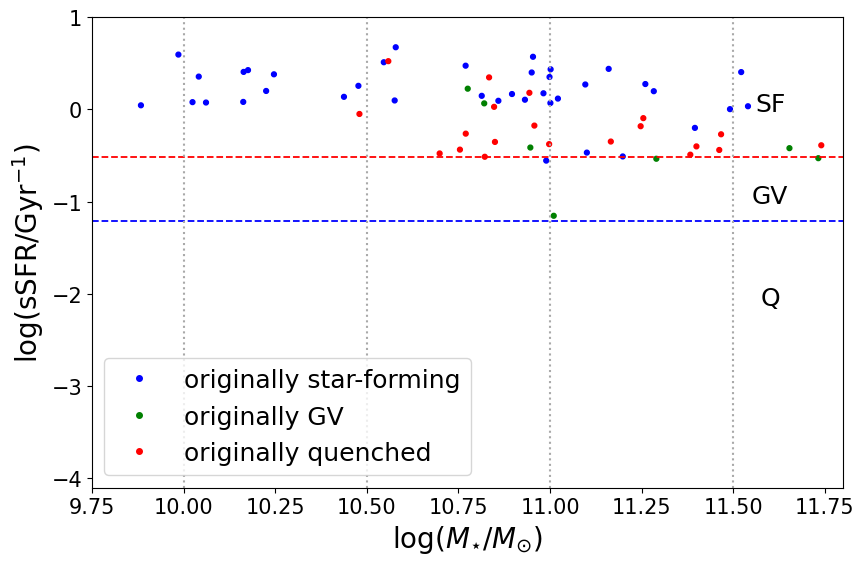

In [2]:
import matplotlib.pyplot as plt
import h5py
import numpy as np
import caesar
import matplotlib.lines as mlines

#plt.rc('text', usetex=False)  # Disable LaTeX integration

if __name__ == '__main__':
    model = "m50n512"
    wind = "s50nojet"
    snap = "078"

    data_dir = f'/home/rad/data/{model}/{wind}/'
    sim = caesar.load(f'{data_dir}Groups/{model}_{snap}.hdf5')
    redshift = sim.simulation.redshift

    t_hubble_Gyr = 3.278
    quench = np.log10(1 / t_hubble_Gyr)
    star_forming_cut = np.log10(0.2 / t_hubble_Gyr)

    sample_dir = f'/home/pedroleo/pedroshp/samples-nojet/'
    sample_file = f'{sample_dir}{model}_{wind}_{snap}_galaxy_sample.h5'
    with h5py.File(sample_file, 'r') as sf:
        gal_sm = sf['mass'][:]
        gal_ssfr = sf['ssfr'][:]+9
        gal_ids = sf['gal_ids'][:]

    colors = []
    mapped_SF_ids = [73, 404, 78, 251, 174, 83, 15, 13, 63, 28, 126, 18, 43, 92, 312, 54, 272, 46, 90, 249, 166, 195, 81, 187, 271, 322, 351, 267, 64, 105, 65, 540, 79, 333, 112, 165, 84, 96, 134]
    mapped_GV_ids = [5, 9, 39, 94, 131, 125, 76]
    mapped_Q_ids = [117, 4, 89, 21, 22, 27, 31, 121, 47, 95, 136, 124, 142, 62, 49, 171, 133, 82, 184, 118]

    
    for gid in gal_ids:
        if gid in mapped_SF_ids:
            colors.append('blue')
        elif gid in mapped_GV_ids:
            colors.append('green')
        elif gid in mapped_Q_ids:
            colors.append('red')
        else:
            colors.append('gray')  # default color for other galaxies

    plt.scatter(gal_sm, gal_ssfr, c=colors, s=12, marker='o', label='SIMBA sample')
    plt.axhline(quench, ls='--', lw=1.3, c='red')
    plt.axhline(star_forming_cut, ls='--', lw=1.3, c='blue')
    plt.text(11.56, quench+0.5, 'SF')
    plt.text(11.55, quench-0.5, 'GV')
    plt.text(11.575, quench-1.6, 'Q')



    delta_m = 0.5 #Pedro changed from 0.25
    min_m = 10.
    nbins_m = 3 #Pedro changed from 6
    for i in range(nbins_m + 1):
        plt.axvline(min_m+i*delta_m, ls=':', lw=1.5, c='darkgray')


    
    # Create proxy artists for the legend with filled circles
    star_forming_marker = mlines.Line2D([], [], color='blue', marker='o', linestyle='None',
                                        markersize=4, label='originally star-forming')
    green_valley_marker = mlines.Line2D([], [], color='green', marker='o', linestyle='None',
                                        markersize=4, label='originally GV')
    quenched_marker = mlines.Line2D([], [], color='red', marker='o', linestyle='None',
                                    markersize=4, label='originally quenched')


    plt.legend(handles=[star_forming_marker, green_valley_marker, quenched_marker], loc=3)
        

    plt.xlim(9.75, 11.8)
    plt.ylim(-4.1, 1.0)
    #plt.xlabel(r'log (Mstar / M_sun)')
    #plt.ylabel(r'log (sSFR / Gyr^-1)')

    plt.rc('text', usetex=True)
    plt.xlabel(r'$\log (M_{\star} / M_{\odot})$')
    plt.ylabel(r'$\log (\mathrm{sSFR} / \mathrm{Gyr}^{-1})$')


    #plt.legend(loc=3, fontsize=12)
    plt.tight_layout()
    plt.savefig(f'/home/pedroleo/pedroshp/fully_mine_code/gal_sample_nojet.png', dpi=300)
    plt.show()


In [3]:
import numpy as np
import h5py

model = "m50n512"
wind = "s50nojet"
snap = "078"


t_hubble_Gyr = 3.278
quench = 1 / t_hubble_Gyr
quench = np.log10(quench)

star_forming_cut = 0.2 / t_hubble_Gyr
star_forming_cut = np.log10(star_forming_cut)


sample_dir = f'/home/pedroleo/pedroshp/samples-nojet/'
sample_file = f'{sample_dir}{model}_{wind}_{snap}_galaxy_sample.h5'
with h5py.File(sample_file, 'r') as sf:
    gal_ids = sf['gal_ids'][:]
    gal_ssfr = sf['ssfr'][:] + 9  # this is bcs ssfr is stored in log scale and needs adjustment

# Classifying galaxies and ensuring no duplicates
sf_ids = list(set(gal_ids[gal_ssfr > quench]))
gv_ids = list(set(gal_ids[(gal_ssfr <= quench) & (gal_ssfr > star_forming_cut)]))
q_ids = list(set(gal_ids[gal_ssfr <= star_forming_cut]))

# Printing the IDs with commas
print("Star Forming IDs:", ",".join(map(str, sf_ids)))
print("Green Valley IDs:", ",".join(map(str, gv_ids)))
print("Quenched IDs:", ",".join(map(str, q_ids)))


Star Forming IDs: 131,4,133,134,136,9,267,13,142,15,272,271,18,404,21,22,27,28,540,31,165,166,43,171,46,174,47,49,54,312,184,187,62,63,64,65,322,195,73,333,78,79,81,82,84,89,90,92,94,351,96,95,249,105,112,117,118,121,251,124,125,126
Green Valley IDs: 83,76,5,39
Quenched IDs: 


In [3]:
import h5py
import numpy as np


#base_gals = [8, 10, 9, 265, 50, 49, 12, 13, 18, 26, 62, 71, 90, 93, 15, 119, 37, 184, 36, 28, 125, 47, 38, 84, 130, 39, 80, 97, 57, 74, 41, 56, 322, 75, 96, 177, 45, 83, 246, 126, 91, 66, 137, 211, 198, 340, 118, 303, 148, 210, 128, 183, 332, 124, 217, 154, 189, 133, 185, 186, 295, 253, 257, 319, 261, 318]
match_gals = [5, 15, 4, 174, 90, 46, 9, 13, 28, 18, 47, 64, 76, 49, 63, 96, 22, 125, 21, 43, 134, 39, 92, 112, 78, 54, 79, 171, 81, 105, 27, 121, 351, 65, 165, 94, 31, 131, 133, 118, 62, 95, 83, 124, 267, 333, 84, 272, 126, 136, 73, 249, 540, 82, 142, 89, 187, 117, 166, 195, 312, 184, 404, 322, 251, 271]

# The ones below are NOT mapped!
new_SF_ids =[131,4,133,134,136,9,267,13,142,15,272,271,18,404,21,22,27,28,540,31,165,166,43,171,46,174,47,49,54,312,184,187,62,63,64,65,322,195,73,333,78,79,81,82,84,89,90,92,94,351,96,95,249,105,112,117,118,121,251,124,125,126]
new_GV_ids = [83,76,5,39]
new_Q_ids = [0]


sample_dir = '/home/pedroleo/pedroshp/samples-nojet/'
model = "m50n512"
wind = "s50nojet"
snap = "078"
sample_file = f'{sample_dir}{model}_{wind}_{snap}_galaxy_sample.h5'

# load data
with h5py.File(sample_file, 'r') as sf:
    all_gal_sm = sf['mass'][:]  # All galaxy masses
    all_gal_ids = sf['gal_ids'][:]  # All galaxy IDs

# specific galaxy IDs I want to include
specific_gal_ids = match_gals


# Filter the galaxy masses based on specific IDs
gal_sm = [all_gal_sm[np.where(all_gal_ids == id)[0][0]] for id in specific_gal_ids if id in all_gal_ids]

sf_masses = [m for id, m in zip(specific_gal_ids, gal_sm) if id in new_SF_ids]
gv_masses = [m for id, m in zip(specific_gal_ids, gal_sm) if id in new_GV_ids]
q_masses = [m for id, m in zip(specific_gal_ids, gal_sm) if id in new_Q_ids]

# Define mass bins from 10^10 to 10^12 Msun
bins = np.linspace(10, 11.5, num=4)  # num = 4 is 3 equally spaced bins

# Count the number of galaxies in each bin
sf_counts, _ = np.histogram(sf_masses, bins=bins)
gv_counts, _ = np.histogram(gv_masses, bins=bins)
q_counts, _ = np.histogram(q_masses, bins=bins)

print("Star-Forming Galaxy Counts:", sf_counts)
print("Green Valley Galaxy Counts:", gv_counts)
print("Quenched Galaxy Counts:", q_counts)


Star-Forming Galaxy Counts: [11 26 18]
Green Valley Galaxy Counts: [0 1 2]
Quenched Galaxy Counts: [0 0 0]


In [ ]:
# load data
with h5py.File(sample_file, 'r') as sf:
    gal_sm = sf['mass'][:]  # All galaxy masses

# Print the lowest and highest galaxy mass
lowest_mass = np.min(gal_sm)
highest_mass = np.max(gal_sm)
print(f'Lowest galaxy mass: {lowest_mass:.2f}')
print(f'Highest galaxy mass: {highest_mass:.2f}')


Lowest galaxy mass: 9.67
Highest galaxy mass: 11.74


In [4]:
import h5py
import numpy as np

base_gals = [8, 10, 9, 265, 50, 49, 12, 13, 18, 26, 62, 71, 90, 93, 15, 119, 37, 184, 36, 28, 125, 47, 38, 84, 130, 39, 80, 97, 57, 74, 41, 56, 322, 75, 96, 177, 45, 83, 246, 126, 91, 66, 137, 211, 198, 340, 118, 303, 148, 210, 128, 183, 332, 124, 217, 154, 189, 133, 185, 186, 295, 253, 257, 319, 261, 318]
match_gals = [5, 15, 4, 174, 90, 46, 9, 13, 28, 18, 47, 64, 76, 49, 63, 96, 22, 125, 21, 43, 134, 39, 92, 112, 78, 54, 79, 171, 81, 105, 27, 121, 351, 65, 165, 94, 31, 131, 133, 118, 62, 95, 83, 124, 267, 333, 84, 272, 126, 136, 73, 249, 540, 82, 142, 89, 187, 117, 166, 195, 312, 184, 404, 322, 251, 271]

ids_of_interest = match_gals

sample_dir = '/home/pedroleo/pedroshp/samples-nojet/'
model = "m50n512"
wind = "s50nojet"
snap = "078"
sample_file = f'{sample_dir}{model}_{wind}_{snap}_galaxy_sample.h5'

# Load the data
with h5py.File(sample_file, 'r') as sf:
    gal_sm = sf['mass'][:]  # All galaxy masses
    gal_ids = sf['gal_ids'][:]   # All galaxy IDs

# Filter the masses based on the list of IDs
filtered_masses = gal_sm[np.isin(gal_ids, ids_of_interest)]

# Calculate the average mass of the filtered galaxies
average_mass = np.mean(filtered_masses)
print(f'Average mass of No-jet galaxies: {average_mass:.2f}')


Average mass of No-jet galaxies: 10.87


In [5]:
import h5py
import numpy as np

base_gals = [8, 10, 9, 265, 50, 49, 12, 13, 18, 26, 62, 71, 90, 93, 15, 119, 37, 184, 36, 28, 125, 47, 38, 84, 130, 39, 80, 97, 57, 74, 41, 56, 322, 75, 96, 177, 45, 83, 246, 126, 91, 66, 137, 211, 198, 340, 118, 303, 148, 210, 128, 183, 332, 124, 217, 154, 189, 133, 185, 186, 295, 253, 257, 319, 261, 318]
match_gals = [5, 15, 4, 174, 90, 46, 9, 13, 28, 18, 47, 64, 76, 49, 63, 96, 22, 125, 21, 43, 134, 39, 92, 112, 78, 54, 79, 171, 81, 105, 27, 121, 351, 65, 165, 94, 31, 131, 133, 118, 62, 95, 83, 124, 267, 333, 84, 272, 126, 136, 73, 249, 540, 82, 142, 89, 187, 117, 166, 195, 312, 184, 404, 322, 251, 271]

ids_of_interest = base_gals

sample_dir = '/home/pedroleo/pedroshp/samples/'
model = "m50n512"
wind = "s50"
snap = "078"
sample_file = f'{sample_dir}{model}_{wind}_{snap}_galaxy_sample.h5'

# Load the data
with h5py.File(sample_file, 'r') as sf:
    gal_sm = sf['mass'][:]  # All galaxy masses
    gal_ids = sf['gal_ids'][:]   # All galaxy IDs

# Filter the masses based on the list of IDs
filtered_masses = gal_sm[np.isin(gal_ids, ids_of_interest)]

# Calculate the average mass of the filtered galaxies
average_mass = np.mean(filtered_masses)
print(f'Average mass of Jet galaxies: {average_mass:.2f}')


Average mass of Jet galaxies: 10.69
